<h1>Question:</h1>
<p>How does your major, college, and region affect your graduation salary, and your mid-career salary?</p>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#Add a Markdown stating we are reading in our csv dataset files into a pandas dataframe

In [2]:
#changed path to this because this is what is need to run it off of github
#you can uncomment ur path when you are running this code on ur machine

path = 'C:\\Users\\kalra\\Documents\\NJIT\\Junior\\Fall 2020\\CS 301\\Group Project\\'
# path = "Kaggle Data Sets/"      
deg_df = pd.read_csv(path + 'degrees-that-pay-back.csv', index_col = 0)
salc_df = pd.read_csv(path + 'salaries-by-college-type.csv', index_col = 0)
salr_df = pd.read_csv(path + 'salaries-by-region.csv', index_col = 0)

#Add a markdown stating that we are picking and choosing only the columns we are interested in collecting from Degrees That Pay Back Data Set

In [3]:
#This data set contains all the data we need to answer about how your major effects your starting salary and mid career salary
major_salary = deg_df[["Starting Median Salary", "Mid-Career Median Salary"]]
print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                        $46,000.00               $77,100.00
Aerospace Engineering             $57,700.00              $101,000.00
Agriculture                       $42,600.00               $71,900.00
Anthropology                      $36,800.00               $61,500.00
Architecture                      $41,600.00               $76,800.00


#Add a markdown stating that we are merging the other two data sets together and then choosing only the columns that we need to answer our question

In [4]:
#This cell merges the salary by college and region data set into one data set with no duplicate columns
merged_data = pd.merge(salr_df, salc_df, on="School Name", how = "right", suffixes = ('', '_y'))
merged_data.drop(merged_data.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
merged_data.sort_values(by="School Name", ascending = True)
college_region = merged_data[["School Type", "Region", "Starting Median Salary", "Mid-Career Median Salary"]].sort_values(by="School Name", ascending = True)
print(college_region.head())

                                  School Type        Region  \
School Name                                                   
Amherst College                  Liberal Arts  Northeastern   
Appalachian State University            State      Southern   
Arizona State University (ASU)          State       Western   
Arizona State University (ASU)          Party       Western   
Arkansas State University (ASU)         State      Southern   

                                Starting Median Salary  \
School Name                                              
Amherst College                             $54,500.00   
Appalachian State University                $40,400.00   
Arizona State University (ASU)              $47,400.00   
Arizona State University (ASU)              $47,400.00   
Arkansas State University (ASU)             $38,700.00   

                                Mid-Career Median Salary  
School Name                                               
Amherst College                  

#Add a markdown showing that this section of this program is all about the dataframe: major_salary
#state that we are formatting the data from string format to float format for easier manipulation in the future

<h1 style="font-size:450%">Analysis on Dataframe: major_salary</h1>

In [5]:
for index,row in major_salary.iterrows():
    val1 = row['Starting Median Salary']
    val1_rep = val1.replace(',', '').replace('$', '')
    row['Starting Median Salary'] = val1_rep

    val2 = row['Mid-Career Median Salary']
    val2_rep = val2.replace(',', '').replace('$', '')
    row['Mid-Career Median Salary'] = val2_rep

In [6]:
#Check for any duplicate values:
duplicateBool= major_salary.duplicated()
duplicates = major_salary.loc[duplicateBool == True]
print("There are %i duplicate values in the dataset" % duplicates.shape[0])

There are 0 duplicate values in the dataset


#Check for any Not a Number value in the column: Starting Median Salary and replace those with the median values of the column and print out the new data frame, if no NaN exists, then just print out the original dataframe

In [7]:
nanValues1 = major_salary.loc[(major_salary['Starting Median Salary'].isna())]
if len(nanValues1) != 0:
    temp = major_salary['Starting Median Salary'].astype(float)
    filledSet1 = temp.fillna(temp.median(skipna = True))
    print("NaN values have been filled in: \n", filledSet1.head())
else:
    print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                          46000.00                 77100.00
Aerospace Engineering               57700.00                101000.00
Agriculture                         42600.00                 71900.00
Anthropology                        36800.00                 61500.00
Architecture                        41600.00                 76800.00


#Check for any Not a Number value in the column: Mid-Career Median Salary and replace those with the median values of the column and print out the new data frame, if no NaN exists, then just print out the original dataframe

In [8]:
nanValues1 = major_salary.loc[(major_salary['Mid-Career Median Salary'].isna())]
if len(nanValues1) != 0:
    temp = major_salary['Mid-Career Median Salary'].astype(float)
    filledSet1 = temp.fillna(temp.median(skipna = True))
    print("NaN values have been filled in: \n", filledSet1.head())
else:
    print(major_salary.head())

                      Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                  
Accounting                          46000.00                 77100.00
Aerospace Engineering               57700.00                101000.00
Agriculture                         42600.00                 71900.00
Anthropology                        36800.00                 61500.00
Architecture                        41600.00                 76800.00


#Create a Box Plot to visualize the spread of the data from the columns: Starting Median Salary and Mid-Career Median Salary

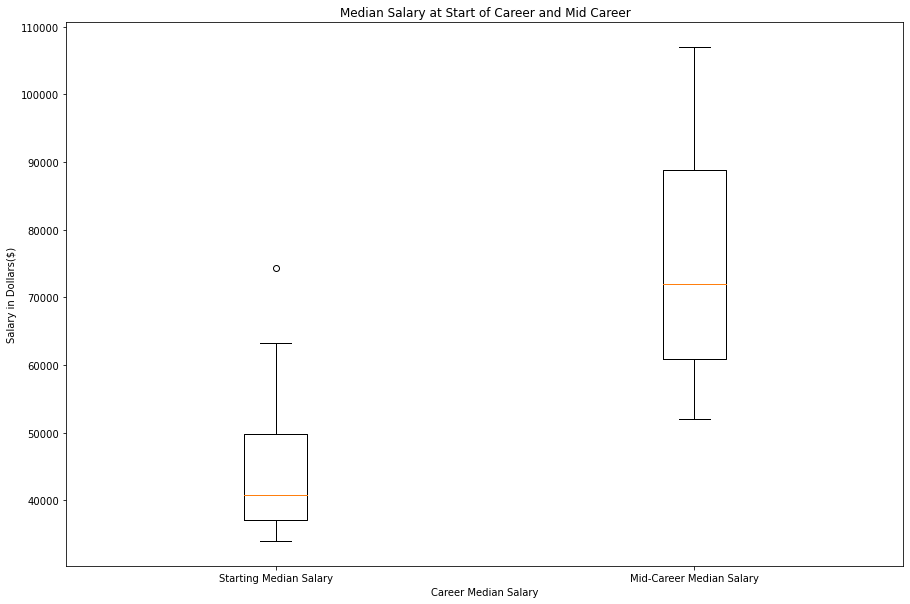

In [9]:
start_career = major_salary['Starting Median Salary'].astype(float)
mid_career = major_salary['Mid-Career Median Salary'].astype(float)
# print(type(start_career))
# print(type(mid_career))

plt.figure(figsize=(15,10))
plt.boxplot([start_career, mid_career])
plt.xticks([1, 2], ['Starting Median Salary', 'Mid-Career Median Salary'])
plt.xlabel("Career Median Salary")
plt.ylabel("Salary in Dollars($)")
plt.title("Median Salary at Start of Career and Mid Career")
plt.show()

#Check for any and all outliers for the column: Starting Median Salary in major_salary

In [10]:
#Get any and all outliers for column Starting Median Salary in major_salary
iqr = start_career.quantile(0.75) - start_career.quantile(0.25)
min = start_career.quantile(0.25) - (1.5 * iqr)
max = start_career.quantile(0.75) + (1.5 * iqr)

min_df = major_salary.loc[major_salary['Starting Median Salary'].astype(float) < min]
max_df = major_salary.loc[major_salary['Starting Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Mid-Career Median Salary")
else:
    print("There is/are %d outlier(s) in column: Starting Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There is/are 1 outlier(s) in column: Starting Median Salary

                    Starting Median Salary Mid-Career Median Salary
Undergraduate Major                                                
Physician Assistant               74300.00                 91700.00


#Check for any and all outliers for the column: Mid-Career Median Salary in major_salary

In [11]:
#Get any and all outliers for column Mid-Career Median Salary in major_salary
iqr = mid_career.quantile(0.75) - mid_career.quantile(0.25)
min = mid_career.quantile(0.25) - (1.5 * iqr)
max = mid_career.quantile(0.75) + (1.5 * iqr)

min_df = major_salary.loc[major_salary['Mid-Career Median Salary'].astype(float) < min]
max_df = major_salary.loc[major_salary['Mid-Career Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Mid-Career Median Salary")
else:
    print("There is/are %d outlier(s) in column: Mid-Career Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 0 outliers in column: Mid-Career Median Salary


In [12]:
#Use this to analyze your boxplots and outliers

#Create a bar graph comparing starting and mid-career median salary of each major that is listed

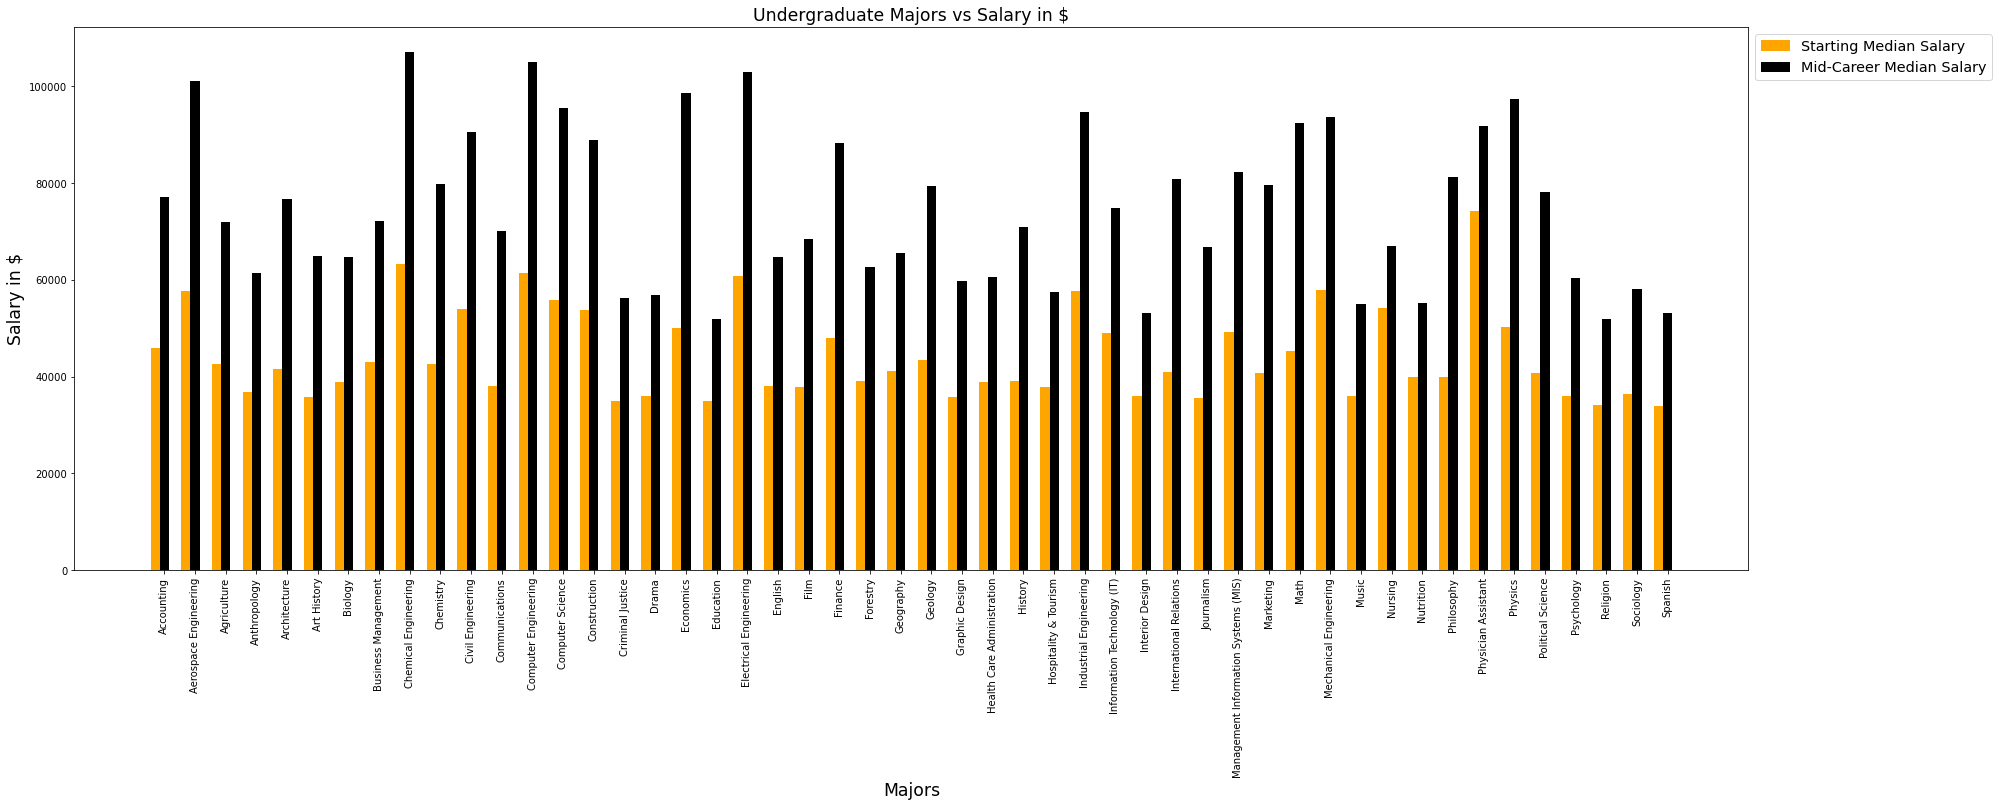

In [13]:
#Code for bar graph goes here
x_axis = major_salary.index
start_series = major_salary['Starting Median Salary'].astype(float)
mid_series = major_salary['Mid-Career Median Salary'].astype(float)
ind = 10*np.arange(len(x_axis))
wid = 3
plt.figure(figsize=(30,10))
plt.bar(ind, start_series, wid, label="Starting Median Salary", color='orange')
plt.bar(ind+wid, mid_series, wid, label="Mid-Career Median Salary", color='black')
plt.title("Undergraduate Majors vs Salary in $", fontsize="xx-large")
plt.xlabel("Majors", fontsize="xx-large")
plt.ylabel("Salary in $", fontsize="xx-large")
plt.xticks(ind+wid, x_axis, rotation='vertical')
plt.legend(loc=0, fontsize="x-large", bbox_to_anchor=(1.15,1))
plt.show()

#Planning on splitting this up into two different graphs for the next deliverable

In [41]:
# Analysis of Dataframe: major_salary 

'''
1.
Boxplot: Median Salary at Start of Career and Mid Career
Starting Median Salary ($):
Maximum: 74300.00
Minimum: 34000.00
Range:   40300.00
The overall median of the Starting Salaries across all the major: 40850.00
On an average, the starting median salary of all majors combined: 44310.00
There is 1 outlier for this category:
Physician Assistant               74300.00

Mid-Career Median Salary:
Maximum ($): 107000.00
Minimum ($): 52000.00
Range ($): 55000.00
The overall median of the Mid-Career Salaries across all the major: 72000.00
On an average, the mid-career median salary of all majors combined: 74786.00
There are 0 outliers for this category.


2.
Bar graph: Undergraduate Major vs Salary in $
The Major with the maximum Starting Median Salary:
    Physician Assistant
The Major(s) with the minimum Mid-Career Median Salary:
    Education
    Religion
The Major with the most increase from Starting Median Salary to Mid-Career Median Salary:
    Economics:
    Start ($): 50100.00
    Mid-Career ($): 98600.00
    Total Increase ($): 78500.00

'''

print("Max: ", mid_career.max(), "\nMin: ", mid_career.min(), "\nRange: ", mid_career.max() - mid_career.min())
print(start_career.mean())

# Economics 98600 - 50100
# Math 92400 - 45400
# Physics 97300 - 50300
print(98600 - 50100)
print(92400 - 45400)
print(97300 - 50300)
# Aerospace 101000 - 57700
# Chemical
# Computer Engineering

Max:  107000.0 
Min:  52000.0 
Range:  55000.0
44310.0
48500
47000
47000


#placeholder for future code

#Add a markdown stating that from here on will be all about the data frame: college_region
#state that we are formatting the data from string format to float format for easier manipulation in the future

<h1 style="font-size:450%">Analysis on Dataframe: college_region</h1>

In [15]:
for y, x in college_region.iterrows():
    stSal = str(x['Starting Median Salary'])
    stSal_fin = stSal.replace('$', '').replace(',', '')
    x['Starting Median Salary'] = stSal_fin

    mdSal = str(x['Mid-Career Median Salary'])
    mdSal_fin = mdSal.replace('$', '').replace(',', '')
    x['Mid-Career Median Salary'] = mdSal_fin
    # print(x['Starting Median Salary'], x['Mid-Career Median Salary'])

In [16]:
#Check for any duplicate values:
duplicateBool= college_region.duplicated()
duplicates = college_region.loc[duplicateBool == True]
print("There are %i duplicate values in the dataset" % duplicates.shape[0])

There are 0 duplicate values in the dataset


#Replace any and all NaN Values with the median values for the salaray related categories

In [17]:
stcr = college_region['Starting Median Salary'].astype(float)
col_df1 = stcr.fillna(stcr.median(skipna = True)).astype(float)
college_region['Starting Median Salary'] = col_df1
# print(col_df.head())

mdcr = college_region['Mid-Career Median Salary'].astype(float)
col_df2 = mdcr.fillna(mdcr.median(skipna = True)).astype(float)
college_region['Mid-Career Median Salary'] = col_df2

#Create a box plot to visualize the spread of data

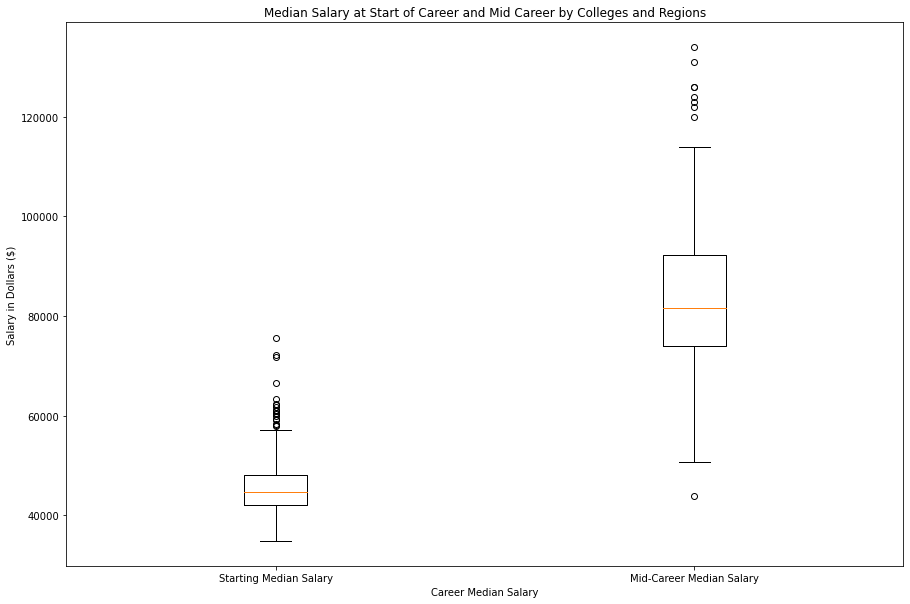

In [18]:
plt.figure(figsize = (15,10))
plt.boxplot([col_df1, col_df2])
plt.xticks([1, 2], ['Starting Median Salary', 'Mid-Career Median Salary'])
plt.xlabel("Career Median Salary")
plt.ylabel("Salary in Dollars ($)")
plt.title("Median Salary at Start of Career and Mid Career by Colleges and Regions")
plt.show()

#Check for any and all outliers for the column: Starting Median Salary in major_salary

In [68]:
#Get any and all outliers for column Starting Median Salary in college_major
iqr = stcr.quantile(0.75) - stcr.quantile(0.25)
min = stcr.quantile(0.25) - (1.5 * iqr)
max = stcr.quantile(0.75) + (1.5 * iqr)

min_df = college_region.loc[college_region['Starting Median Salary'].astype(float) < min]
max_df = college_region.loc[college_region['Starting Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Starting Median Salary")
else:
    print("There are %d outlier(s) in column: Starting Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 19 outlier(s) in column: Starting Median Salary

                                              School Type        Region  \
School Name                                                               
California Institute of Technology (CIT)      Engineering    California   
Carnegie Mellon University (CMU)              Engineering  Northeastern   
Colorado School of Mines                      Engineering       Western   
Columbia University                            Ivy League  Northeastern   
Cooper Union                                  Engineering  Northeastern   
Cornell University                             Ivy League  Northeastern   
Dartmouth College                              Ivy League  Northeastern   
Georgia Institute of Technology               Engineering      Southern   
Harvard University                             Ivy League  Northeastern   
Harvey Mudd College                           Engineering    California   
Massachusetts Institute of Technology (MI

#Check for any and all outliers for the column: Mid-Career Median Salary in major_salary

In [20]:
#Get any and all outliers for column Mid-Career Median Salary in college_region
iqr = mdcr.quantile(0.75) - mdcr.quantile(0.25)
min = mdcr.quantile(0.25) - (1.5 * iqr)
max = mdcr.quantile(0.75) + (1.5 * iqr)

min_df = college_region.loc[college_region['Mid-Career Median Salary'].astype(float) < min]
max_df = college_region.loc[college_region['Mid-Career Median Salary'].astype(float) > max]
outliers = pd.concat([min_df, max_df])
if(len(outliers) == 0):
    print("There are 0 outliers in column: Mid-Career Median Salary")
else:
    print("There are %d outlier(s) in column: Mid-Career Median Salary\n" % len(outliers))
    print(outliers.head(len(outliers)))

There are 9 outlier(s) in column: Mid-Career Median Salary

                                             School Type        Region  \
School Name                                                              
Black Hills State University                       State    Midwestern   
California Institute of Technology (CIT)     Engineering    California   
Dartmouth College                             Ivy League  Northeastern   
Harvard University                            Ivy League  Northeastern   
Harvey Mudd College                          Engineering    California   
Massachusetts Institute of Technology (MIT)  Engineering  Northeastern   
Princeton University                          Ivy League  Northeastern   
University of Pennsylvania                    Ivy League  Northeastern   
Yale University                               Ivy League  Northeastern   

                                             Starting Median Salary  \
School Name                                           

In [72]:
#Use this to analyze your boxplots and outliers
print("Max: ", stcr.max(), "\nMin: ", stcr.min(), "\nRange: ", stcr.max() - stcr.min(), '\nMedian: ', stcr.median(), '\nMean: ', stcr.mean())

Max:  75500.0 
Min:  34800.0 
Range:  40700.0 
Median:  44700.0 
Mean:  46043.65671641791


#Check for NaN in the categorical column: region, and fill any NaN values with the mode value in the column

In [22]:
college_region['Region'] = college_region['Region'].fillna(college_region['Region'].mode()[0])
reg = college_region['Region'].unique()

#Visualize the frequency of colleges in each region

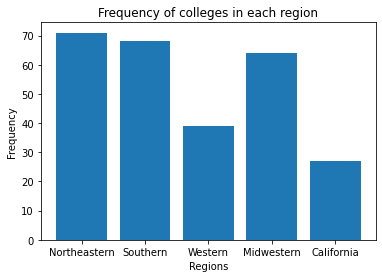

In [23]:
regn = college_region["Region"].unique()
freqRG = []
StartValsRG = []
MidValsRG = []
for k in range(len(regn)):
    x = 0
    for j in range(college_region.shape[0]):
        if regn[k] == college_region['Region'][j]:
            StartValsRG.append(college_region['Starting Median Salary'][j])
            MidValsRG.append(college_region['Mid-Career Median Salary'][j])
            x += 1
        else:
            continue
    freqRG.append(x)
    x = 0
plt.bar(reg, freqRG)
plt.title('Frequency of colleges in each region')
plt.xlabel('Regions')
plt.ylabel('Frequency')
plt.show()

In [24]:
#Use this to analyze your graphs

#visualize the frequecy of college types for use in the future:

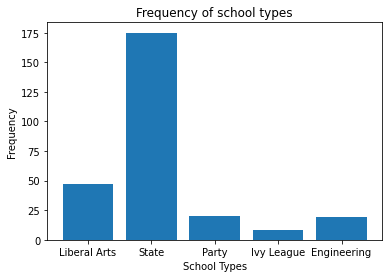

In [25]:
scltp = college_region["School Type"].unique()
frqST = []
StartValsST = []
MidValsST = []
for k in range(len(scltp)):
    x = 0
    for j in range(college_region.shape[0]):
        if scltp[k] == college_region['School Type'][j]:
            StartValsST.append(college_region['Starting Median Salary'][j])
            MidValsST.append(college_region['Mid-Career Median Salary'][j])
            x += 1
        else:
            continue
    frqST.append(x)
    x = 0
plt.bar(scltp, frqST)
plt.title('Frequency of school types')
plt.xlabel('School Types')
plt.ylabel('Frequency')
plt.show()

In [26]:
#Use this to analyze your graphs

In [27]:
#Make a graph comparing school type to average starting and mid-career salary(graph type is up to you)

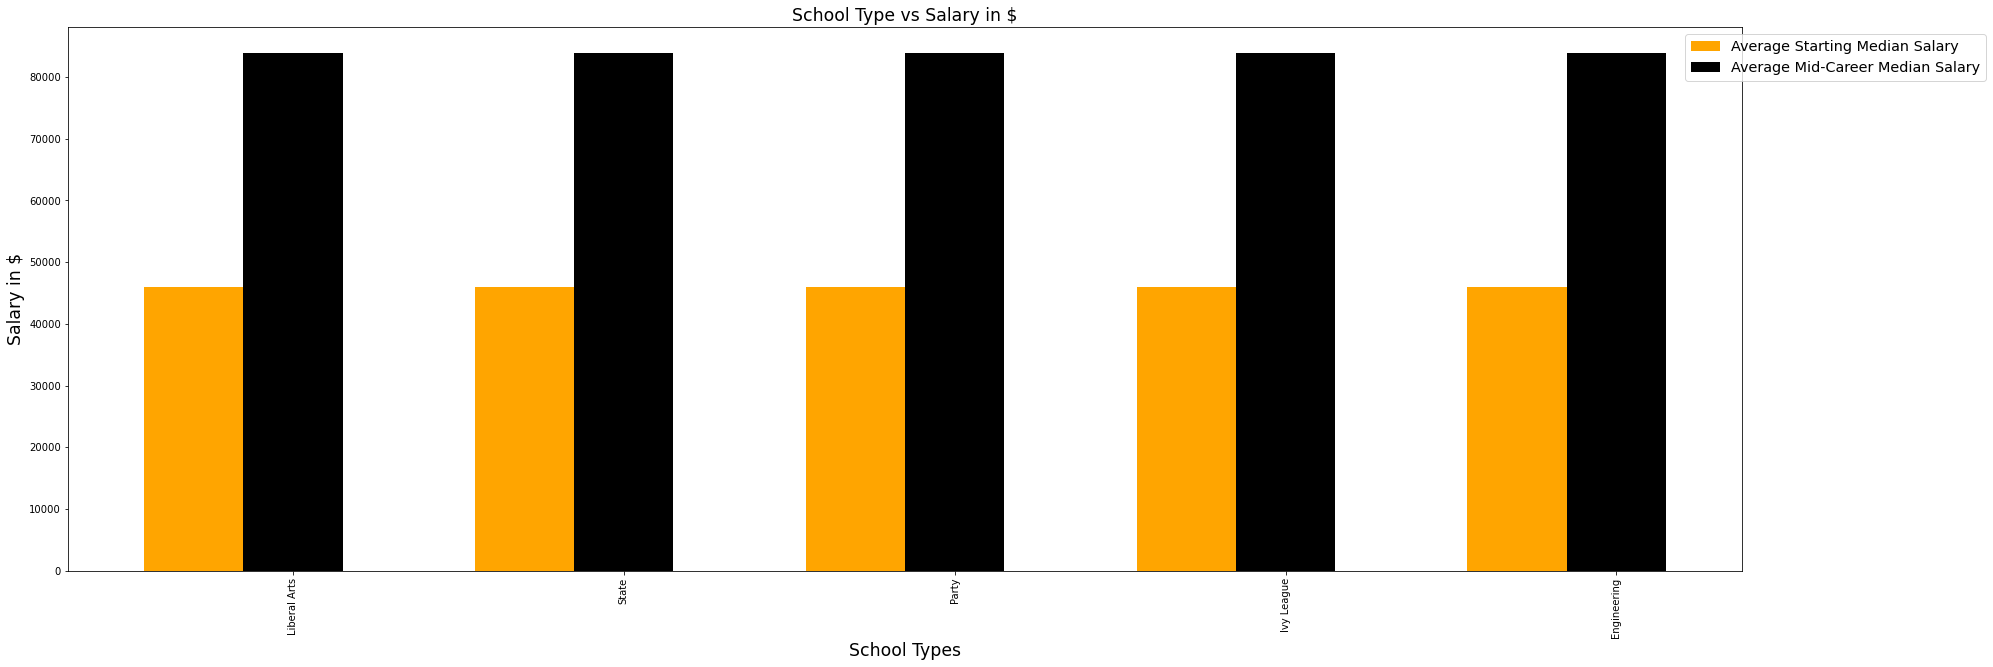

In [28]:
#Code Here
x_axis = scltp
#start_series = college_region['Starting Median Salary'].astype(float)
startMean = college_region['Starting Median Salary'].astype(float).mean()
#mid_series = college_region['Mid-Career Median Salary'].astype(float)
midMean = college_region['Mid-Career Median Salary'].astype(float).mean()
ind = 10 * np.arange(len(x_axis))
wid = 3
plt.figure(figsize = (30,10))
plt.bar(ind, startMean, wid, label = "Average Starting Median Salary", color = 'orange')
plt.bar(ind + wid, midMean, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("School Type vs Salary in $", fontsize = "xx-large")
plt.xlabel("School Types", fontsize = "xx-large")
plt.ylabel("Salary in $", fontsize = "xx-large")
plt.xticks(ind + wid, x_axis, rotation = 'vertical')
plt.legend(loc = 0, fontsize = "x-large", bbox_to_anchor = (1.15,1))
plt.show()

In [29]:
#Use this to analyze your graphs

In [30]:
#Make a graph comparing college region to average starting and mid-career salary(graph type is up to you)

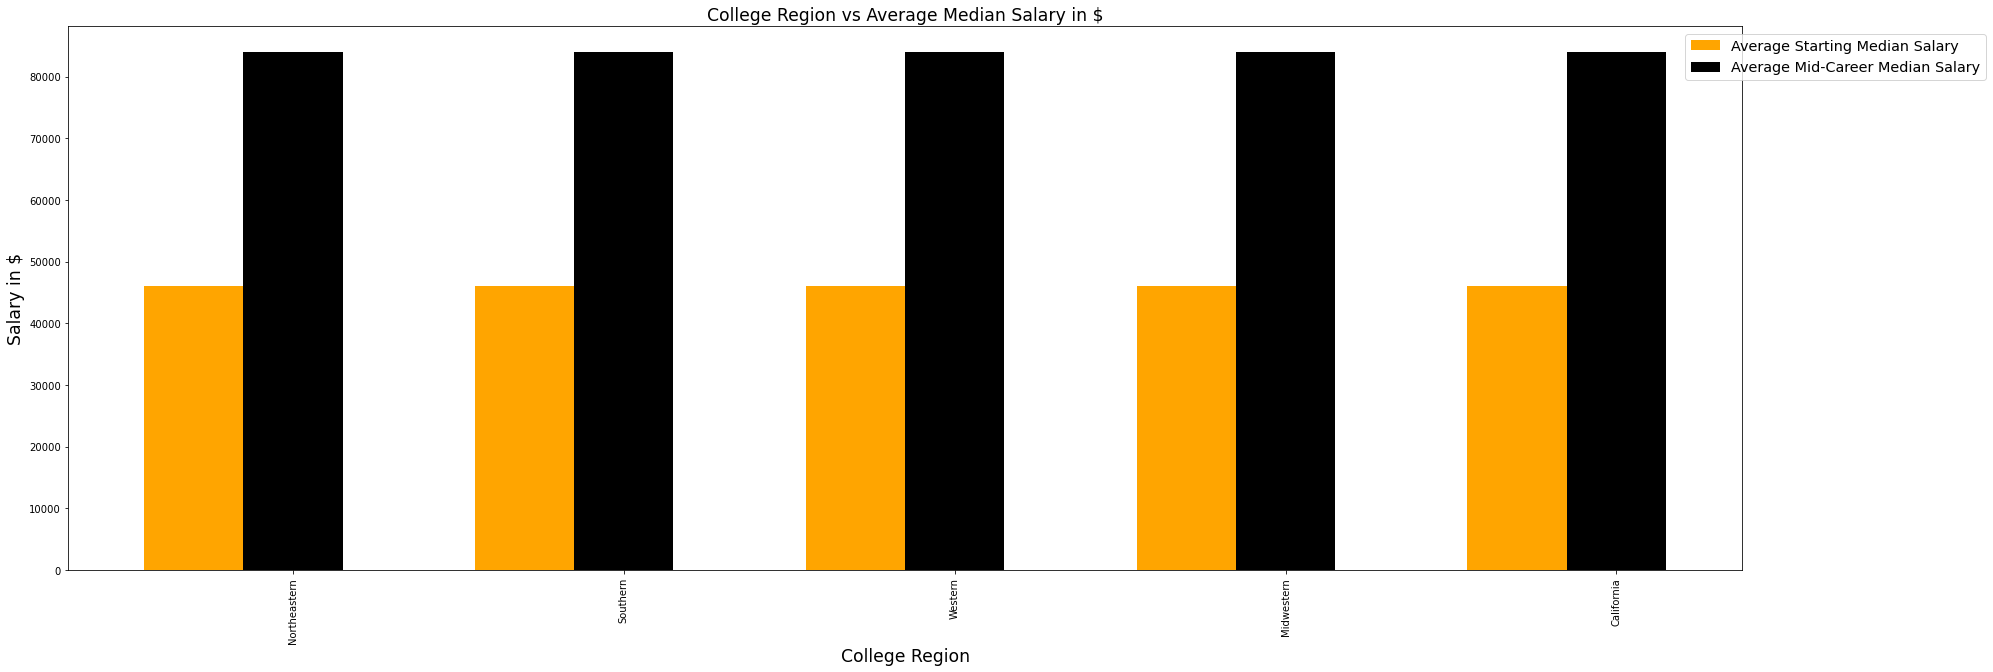

In [31]:
#Code Here
x_axis = regn
ind = 10 * np.arange(len(x_axis))
wid = 3
plt.figure(figsize = (30,10))
plt.bar(ind, startMean, wid, label = "Average Starting Median Salary", color = 'orange')
plt.bar(ind + wid, midMean, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("College Region vs Average Median Salary in $", fontsize = "xx-large")
plt.xlabel("College Region", fontsize = "xx-large")
plt.ylabel("Salary in $", fontsize = "xx-large")
plt.xticks(ind + wid, x_axis, rotation = 'vertical')
plt.legend(loc = 0, fontsize = "x-large", bbox_to_anchor = (1.15,1))
plt.show()

In [32]:
#Use this to analyze your graphs

In [33]:
#Make a graph comparing college name vs starting and mid-career salary(graph type is up to you)

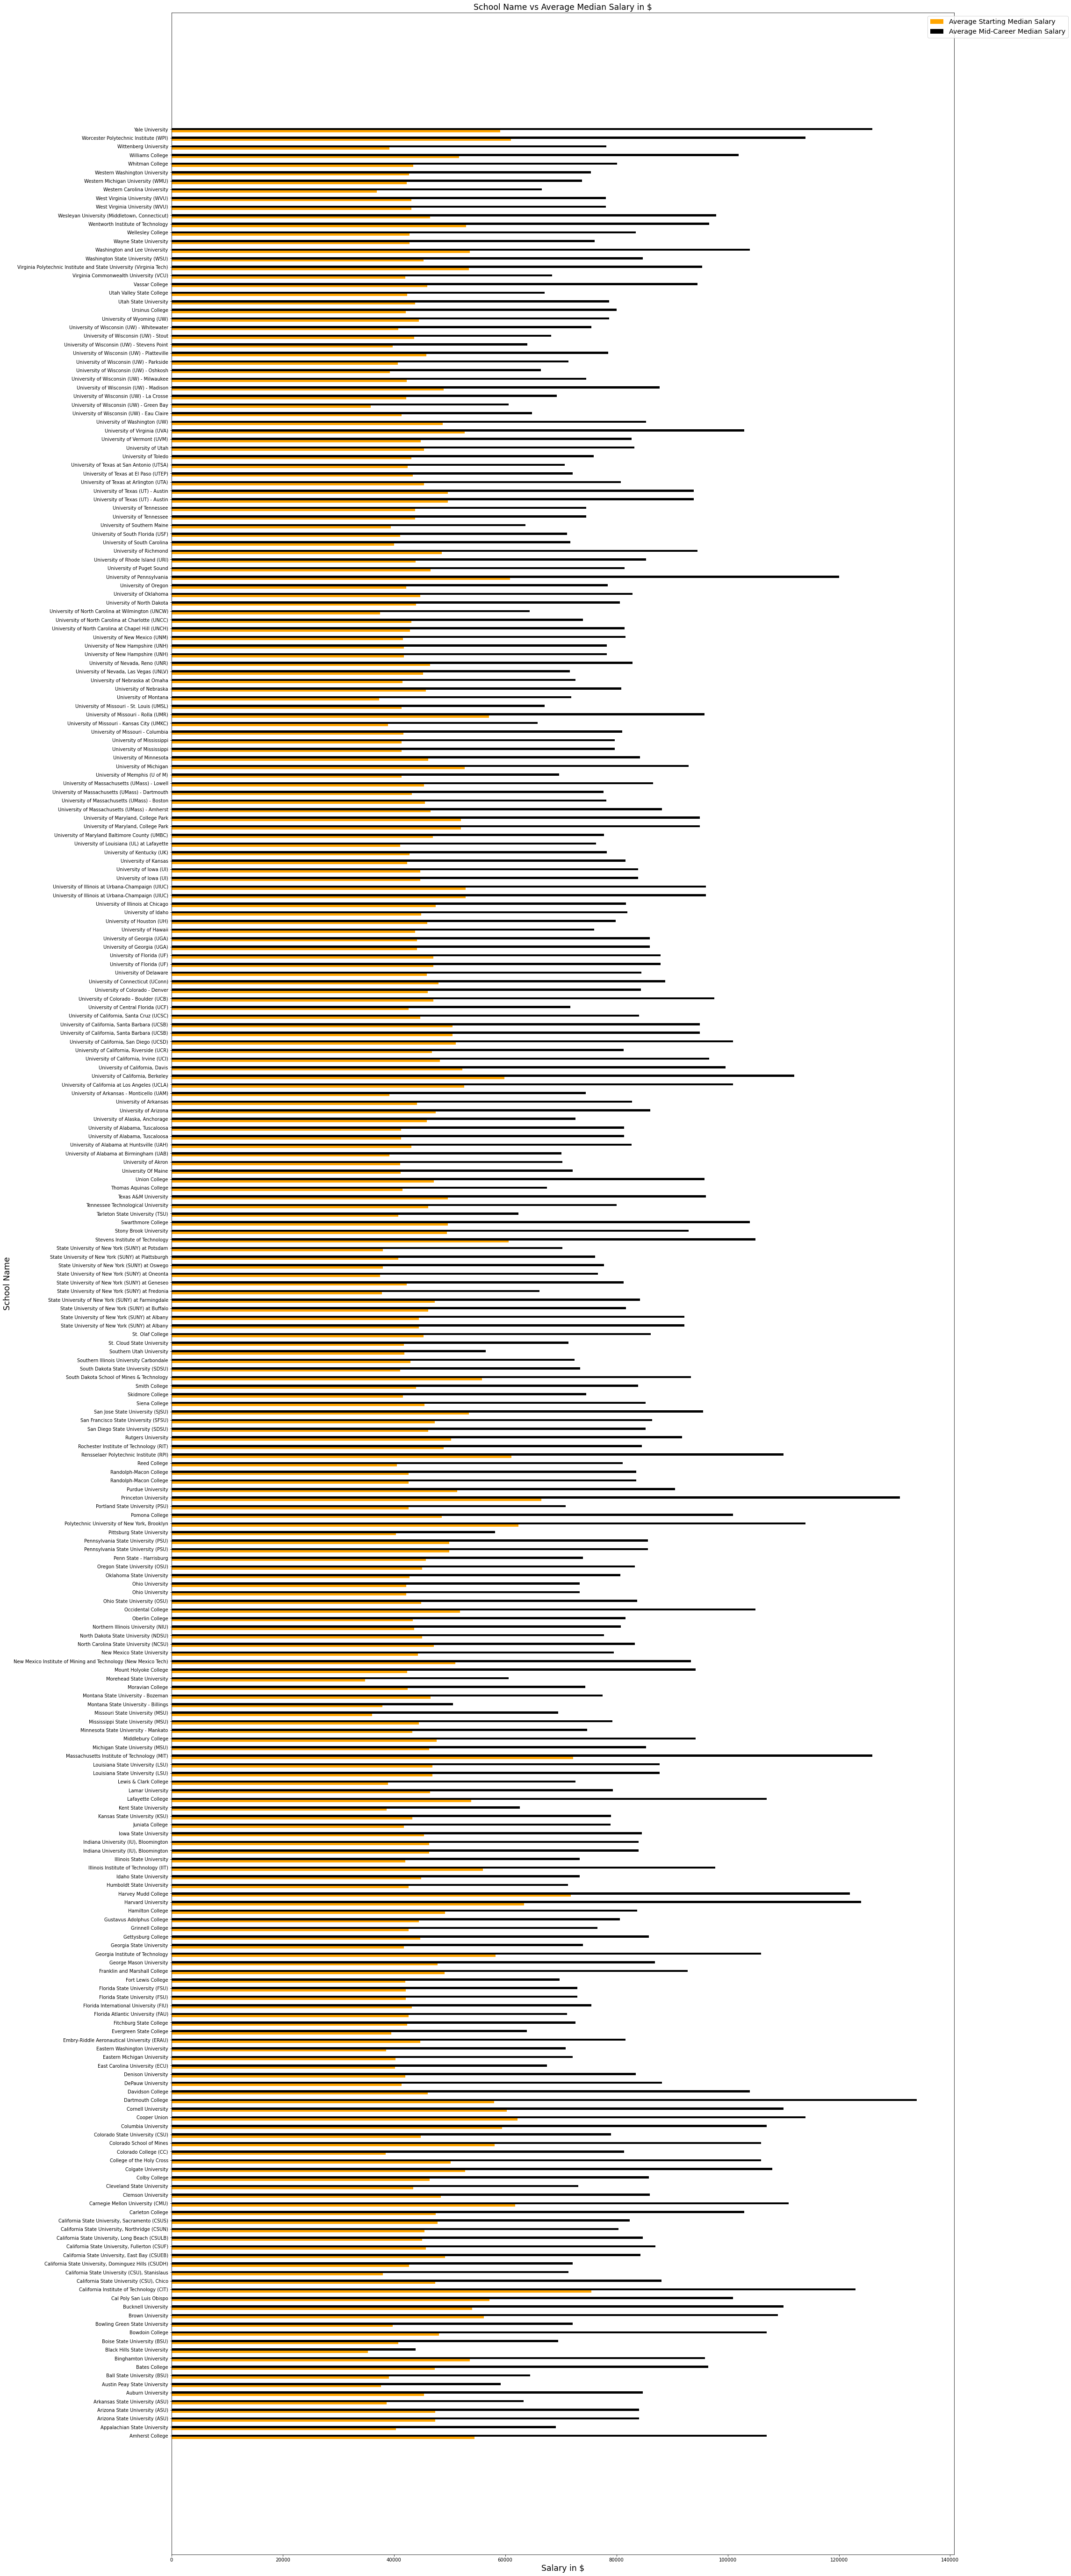

In [34]:
#Code Here
y_axis = college_region.index
SMS = college_region['Starting Median Salary'].astype(float)
MMS = college_region['Mid-Career Median Salary'].astype(float)
ind = 60 * np.arange(len(y_axis))
wid = 15
plt.figure(figsize = (30,100))
plt.barh(ind, SMS, wid, label = "Average Starting Median Salary", color = 'orange')
plt.barh(ind + wid, MMS, wid, label = "Average Mid-Career Median Salary", color = 'black')
plt.title("School Name vs Average Median Salary in $", fontsize = "xx-large")
plt.ylabel("School Name", fontsize = "xx-large")
plt.xlabel("Salary in $", fontsize = "xx-large")
plt.yticks(ind + wid, y_axis, rotation = 'horizontal')
plt.legend(loc = 0, fontsize = "x-large", bbox_to_anchor = (1.15,1))
plt.show()

In [62]:
#Use this to analyze your graphs
scltpAvg = []
no = 0
for v in range(len(frqST)):
    lst = []
    for d in range(no, frqST[v]):
        lst.append(StartValsST[d])
    print(frqST[v])
    print(lst)
    no = no + frqST[v]
    '''scltpAvg.append(sum(lst)/len(lst))

print(scltpAvg)'''

47
[54500.0, 47300.0, 48100.0, 54100.0, 47500.0, 46400.0, 52800.0, 50200.0, 38500.0, 46100.0, 41400.0, 42000.0, 39500.0, 42000.0, 49100.0, 44700.0, 42600.0, 44500.0, 49200.0, 41800.0, 53900.0, 38900.0, 47700.0, 42500.0, 42400.0, 43400.0, 51900.0, 48600.0, 42600.0, 40500.0, 45500.0, 41600.0, 44000.0, 45300.0, 49700.0, 41500.0, 47200.0, 46600.0, 48600.0, 42100.0, 46000.0, 53600.0, 42800.0, 46500.0, 43500.0, 51700.0, 39200.0]
175
[40400.0, 47400.0, 38700.0, 45400.0, 37700.0, 39100.0, 53600.0, 35300.0, 40800.0, 39800.0, 57200.0, 47400.0, 38000.0, 42700.0, 49200.0, 45700.0, 45100.0, 45500.0, 47800.0, 48400.0, 43500.0, 44800.0, 40200.0, 40300.0, 38600.0, 42400.0, 42600.0, 43200.0, 42100.0, 47800.0, 41800.0, 42600.0, 44900.0, 42000.0, 46300.0, 45400.0, 43300.0, 38700.0, 46500.0, 46900.0, 46300.0, 43300.0, 44500.0, 36100.0, 37900.0, 46600.0, 34800.0, 44300.0, 47200.0, 45100.0, 43600.0, 44900.0, 42200.0, 42800.0, 45100.0, 45700.0, 49900.0, 40400.0, 42600.0, 51400.0, 50300.0, 46200.0, 47300.0, 5

In [66]:
#placeholder for future code